# Future Sales

- 과거 판매량 데이터를 기반으로 향후 판매량을 예측하는 프로젝트
- 데이터 다운로드 : https://www.kaggle.com/competitions/competitive-data-science-predict-future-sales/data

---

# Load Data

In [18]:
# pip install seaborn


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
PATH = "C:/Data/Future_Sales/"

train = pd.read_csv(PATH + "sales_train.csv")
test = pd.read_csv(PATH + "test.csv")

shops = pd.read_csv(PATH + "shops.csv")
items = pd.read_csv(PATH + "items.csv")
category = pd.read_csv(PATH + "item_categories.csv")

---

# 1. EDA

## 연도별 총 판매량 그래프

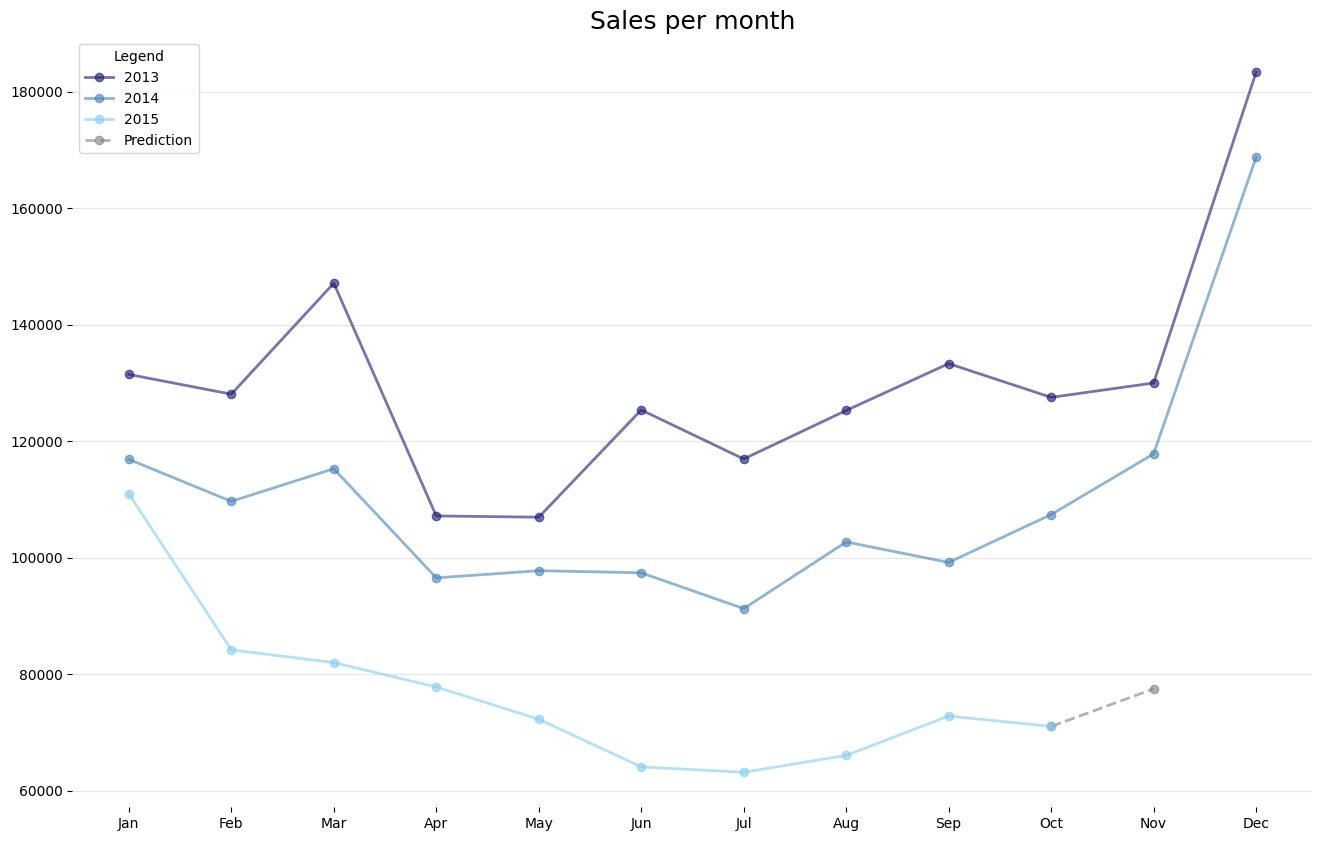

In [5]:
MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

LINEWIDTH=2
ALPHA=.6

dfp = train[['date', 'date_block_num','item_cnt_day']].copy()

dfp['date']  = pd.to_datetime(dfp['date'], format='%d.%m.%Y') # datetime 형식으로 변환
dfp['year']  = dfp['date'].dt.year
dfp['month'] = dfp['date'].dt.month
dfp.drop(['date'], axis=1, inplace=True)

# 각 월별로 판매된 아이템 수 총량 구하기('item_cnt_month')
# Sum the number of sold items for each date_block_num (which is the consecutive month number from January 2013 to October 2015)
dfp = dfp.groupby('date_block_num', as_index=False)\
       .agg({'year':'first', 'month':'first', 'item_cnt_day':'sum'})\
       .rename(columns={'item_cnt_day':'item_cnt_month'}, inplace=False)

# 그래프 크기 조절
plt.figure(figsize=(16,10))

# 2013년 판매 그래프
plt.plot(MONTHS, dfp[dfp.year==2013].item_cnt_month, '-o', color='midnightblue', linewidth=LINEWIDTH, alpha=ALPHA,label='2013')

# 2014년 판매 그래프
plt.plot(MONTHS, dfp[dfp.year==2014].item_cnt_month, '-o', color='steelblue', linewidth=LINEWIDTH, alpha=ALPHA,label='2014')

# 2015년 10월까지의 판매 그래프
plt.plot(MONTHS[:10], dfp[dfp.year==2015].item_cnt_month, '-o', color='skyblue', linewidth=LINEWIDTH, alpha=ALPHA,label='2015')

# Capturing the trend between 10월 and 11월 (For year 2013 and 2014)
delta_2013 = dfp.iloc[10].item_cnt_month - dfp.iloc[9].item_cnt_month
delta_2014 = dfp.iloc[22].item_cnt_month - dfp.iloc[21].item_cnt_month
avg_delta = (delta_2013 + delta_2014) / 2 # 2013년, 2014년 각각 10월, 11월의 평균 변화량

# Add the average to the previous month (October 2015)
# 2015년 10월에 평균 변화량 더하기
nov_2015 = dfp.iloc[33].item_cnt_month + avg_delta

# MONTHS[9:11] equals ['Oct', 'Nov']
plt.plot(MONTHS[9:11], [dfp.iloc[33].item_cnt_month, nov_2015], '--o', color='grey', linewidth=LINEWIDTH, alpha=ALPHA, label='Prediction', zorder=-1)

ax = plt.gca()
ax.set_title('Sales per month', fontsize=18)
# ax.set_ylabel('the number of sold items')
ax.grid(axis='y', color='gray', alpha=.2)
    
# Remove the frame off the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# 범례
plt.legend(loc=2, title='Legend')
plt.show()

del dfp

## 이상치 확인

In [ ]:
# plt.figure(figsize=(10,4))
# plt.xlim(-100, 3000)

# flierprops = dict(marker='o', markerfacecolor='steelblue', markersize=6,
#                   linestyle='none', markeredgecolor='blue')
# sns.boxplot(x=train.item_cnt_day, flierprops=flierprops)


# plt.figure(figsize=(10,4))
# plt.xlim(train.item_price.min(), train.item_price.max()*1.1)
# sns.boxplot(x=train.item_price, flierprops=flierprops)

<AxesSubplot: xlabel='item_price'>

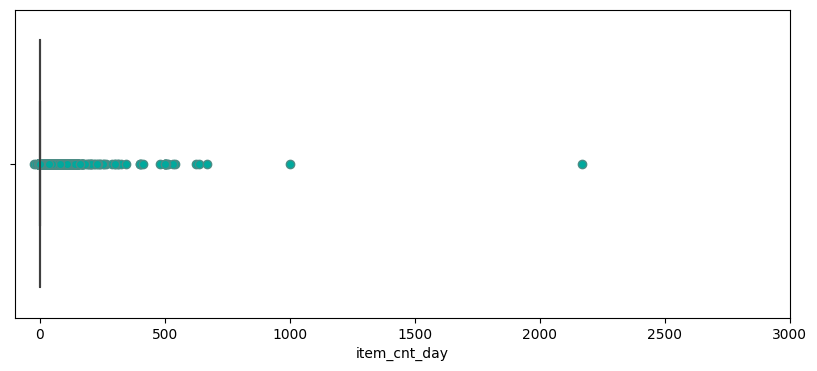

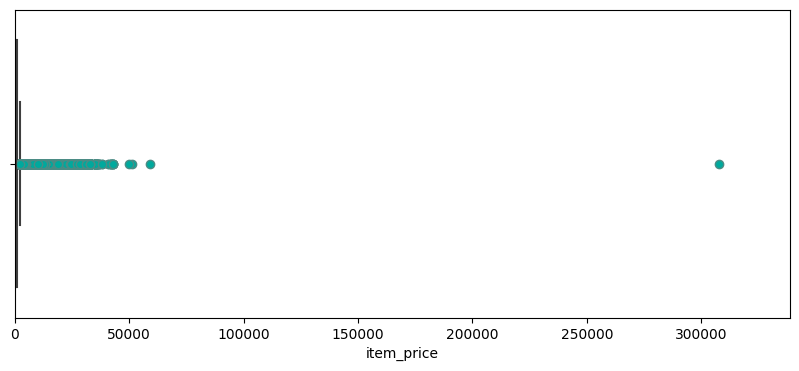

In [8]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)

flierprops = dict(marker='o', markerfacecolor='#00a99d', markersize=6,
                  linestyle='none', markeredgecolor='#4B8C85')
sns.boxplot(x=train.item_cnt_day, flierprops=flierprops)


plt.figure(figsize=(10,4))
plt.xlim(train.item_price.min(), train.item_price.max()*1.1)
sns.boxplot(x=train.item_price, flierprops=flierprops)

In [23]:
len(train[train["item_price"]<0])

1

In [24]:
train[train["item_price"]<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [11]:
train = train[(train["item_cnt_day"] > 0) & (train["item_cnt_day"] < 1000)]
train = train[(train["item_price"] > 0) & (train["item_price"] < 50000)]

## 변수 변환

### 로그 변환 전: Item_price

C:\Users\student\AppData\Local\Temp\ipykernel_8140\1800428267.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["item_price"], color = "#00a99d")


Skewness: 8.988984846367467
Kurtosis: 109.36550821171072


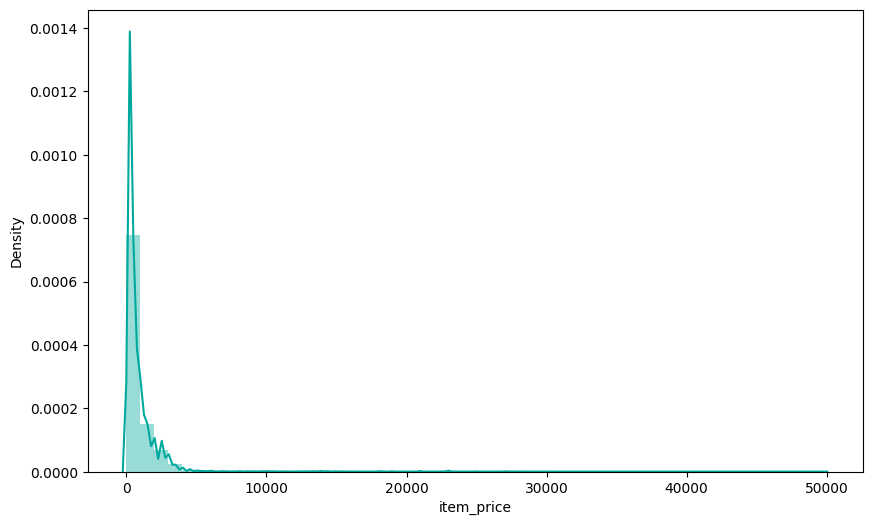

In [12]:
# 로그 변환 전

f, ax = plt.subplots(figsize = (10, 6))
sns.distplot(train["item_price"], color = "#00a99d")

print(f"Skewness:", train["item_price"].skew()) # 절대값이 1보다 큰 경우에는 정규분포에서 벗어난 것
print(f"Kurtosis:", train["item_price"].kurt())

### 로그 변환 전: Item_price

#### np.log1p : 음수값 -inf 방지
- 데이터가 0인 경우 -inf로 변환됨을 방지하기 위해서이다.
- (로그변환 후, 원래 값으로 다시 변환하기 위해 np.expm1() 함수를 사용한다.)

C:\Users\student\AppData\Local\Temp\ipykernel_8140\1591306922.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["item_price"], color = "#00a99d")


Skewness: -0.4804524225960942
Kurtosis: 3.021223557561734


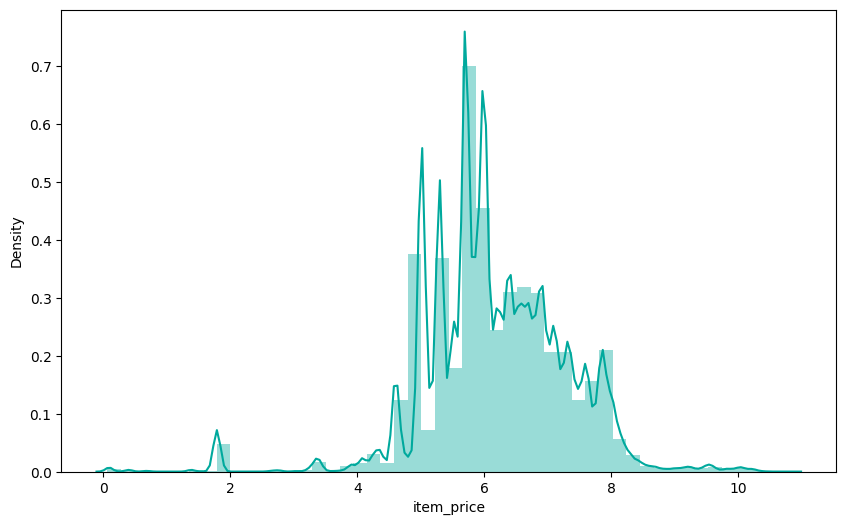

In [14]:
# 로그 변환 후 
train["item_price"] = np.log1p(train["item_price"]) # 캐글에서는 log(1+x)가 에러나더니 ..? 
f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(train["item_price"], color = "#00a99d")

# 로그 변환 후 왜도 10 -> -0.4 으로 절댓값 줄어듦 (절댓값 1에 가까울수록 정규성을 가짐)
# 첨도의 절대값이 7보다 작아야 정상분포. 109 -> 3으로 절댓값 많이 줄어듦
print(f"Skewness:", train["item_price"].skew())
print(f"Kurtosis:", train["item_price"].kurt())

In [28]:
# # 다시 되돌리기
# train["item_price"] = np.expm1(train["item_price"])

### 로그 변환 전 : Item_cnt_day

In [29]:
train["item_cnt_day"].value_counts()

1.0      2629368
2.0       194201
3.0        47350
4.0        19685
5.0        10474
          ...   
512.0          1
508.0          1
412.0          1
128.0          1
161.0          1
Name: item_cnt_day, Length: 187, dtype: int64

In [30]:
train["item_cnt_day"].describe()

count    2.928487e+06
mean     1.247256e+00
std      2.217428e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      6.690000e+02
Name: item_cnt_day, dtype: float64

C:\Users\student\AppData\Local\Temp\ipykernel_8140\3543467068.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["item_cnt_day"], color = "#00a99d")


Skewness: 100.32889633877642
Kurtosis: 20211.320791783757


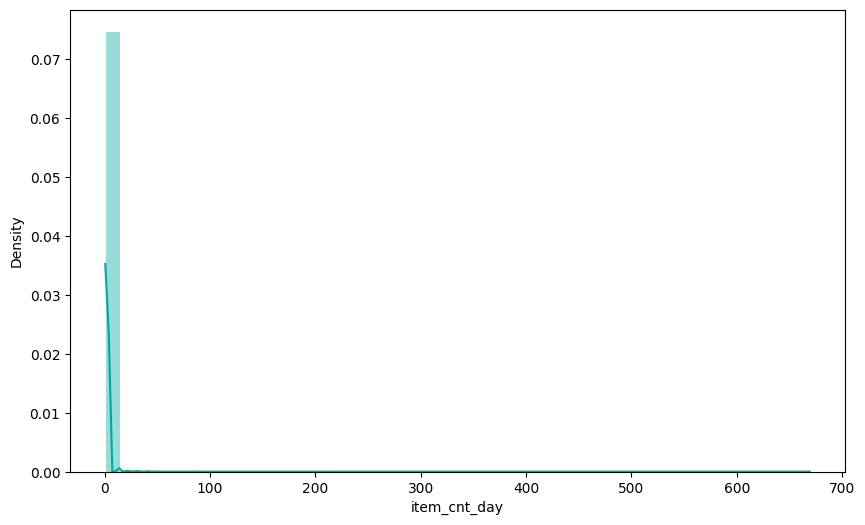

In [15]:
f, ax = plt.subplots(figsize = (10, 6))
sns.distplot(train["item_cnt_day"], color = "#00a99d")

print(f"Skewness:", train["item_cnt_day"].skew()) # 절대값이 1보다 큰 경우에는 정규분포에서 벗어난 것
print(f"Kurtosis:", train["item_cnt_day"].kurt())

## 로그변환 후 : Item_cnt_day

C:\Users\student\AppData\Local\Temp\ipykernel_8140\1746142005.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["item_cnt_day"], color = "#00a99d")


Skewness: 5.727819354801666
Kurtosis: 47.02832712290062


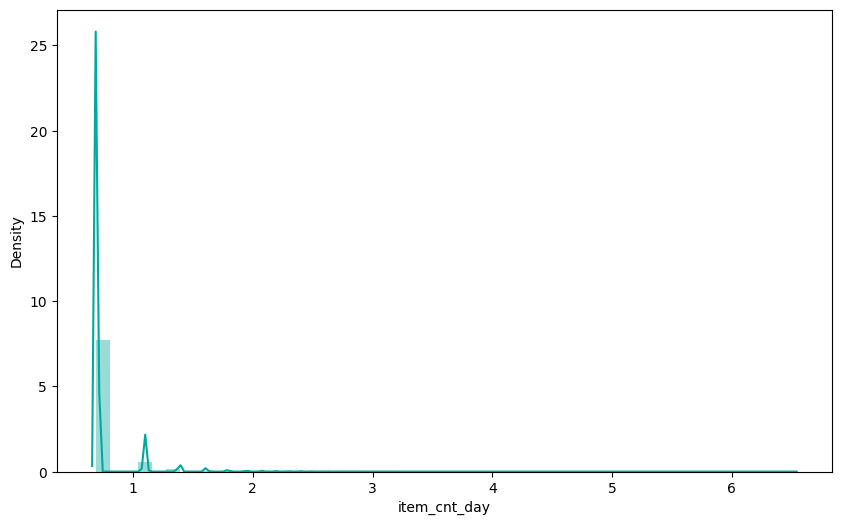

In [16]:
# 로그 변환 후 
train["item_cnt_day"] = np.log1p(train["item_cnt_day"])
f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(train["item_cnt_day"], color = "#00a99d")

# 로그 변환 후 왜도 10 -> -0.4 으로 절댓값 줄어듦 (절댓값 1에 가까울수록 정규성을 가짐)
# 첨도의 절대값이 7보다 작아야 정상분포. 109 -> 3으로 절댓값 많이 줄어듦
print(f"Skewness:", train["item_cnt_day"].skew())
print(f"Kurtosis:", train["item_cnt_day"].kurt())

In [ ]:
# # 로그 변환 칼럼 생성 코드
# train["Log_item_price"] = np.log1p(train["item_price"])
# train["Log_item_cnt_day"] = np.log1p(train["item_cnt_day"])

---

References
- https://hong-yp-ml-records.tistory.com/28
- https://brain-nim.tistory.com/22
- https://dad-rock.tistory.com/1002?category=931563